In [130]:
# Import packages
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [131]:
# Read dataset
dataset = pd.read_csv("/Users/kittyli/Downloads/weather-data.csv")
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [132]:
# Dataset describe
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [133]:
# Dataset instances information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

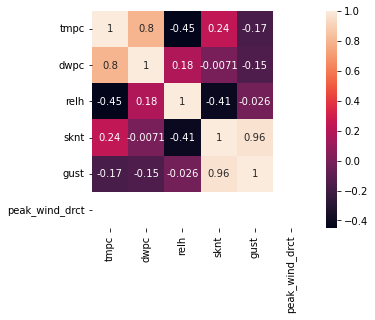

In [134]:
# Correlationship of features
sns.heatmap(dataset.corr(), annot=True, square=True)

# We found that all except two temperature features were not highly correlated. 
# Therefore, our following model does not need to learn the correlation of these features.

/var/folders/n8/b0h19_qd25197zqs3z5mpf3h0000gn/T/ipykernel_48298/3357546189.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


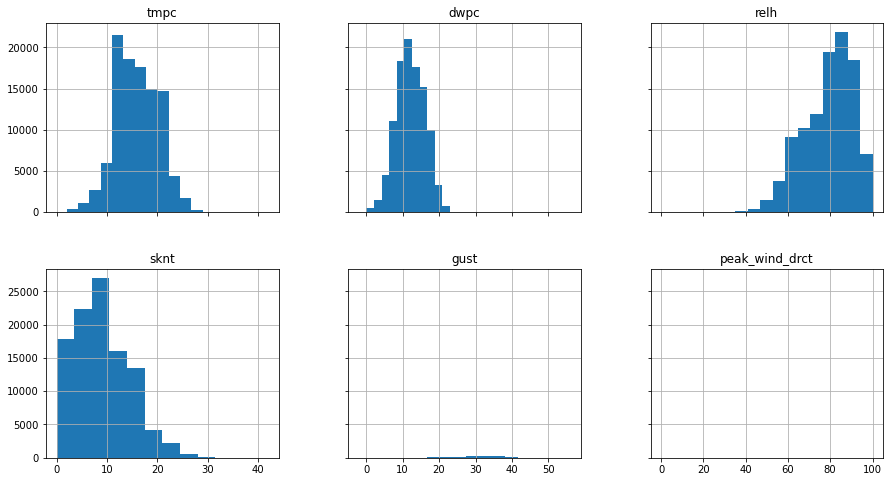

In [135]:
# Histgram plot to show the distribution of instances in each dimension
# Since "station" and "valid" columns are object values, we just plot the other six numerical values.

fig, ax = plt.subplots(2, 3,sharex='col', sharey='row')

m=2
for i in range(2):
    for j in range(3):

        dataset.hist(column = dataset.columns[m], bins = 12 ,ax=ax[i,j])
        m+=1
        
fig.set_size_inches(15,8)
fig.show()

In [136]:
# Base on the histogram and the dataset information, we find that columns 'gust' and 'peak_wind_drct' 
#contain too many "Nan" (missing values). Therefore, we remove these two columns.  

dataset = dataset.drop(columns = ['gust','peak_wind_drct'])
print(dataset.head(10))

   station             valid  tmpc  dwpc   relh  sknt
0     NZAA  2015-01-01 00:00  21.0  11.0  52.77  15.0
1     NZAA  2015-01-01 00:30  21.0  10.0  49.37  16.0
2     NZAA  2015-01-01 01:00  21.0  12.0  56.38  16.0
3     NZAA  2015-01-01 01:30  21.0  13.0  60.21  16.0
4     NZAA  2015-01-01 02:00  21.0  12.0  56.38  16.0
5     NZAA  2015-01-01 02:30  21.0  12.0  56.38  13.0
6     NZAA  2015-01-01 03:00  21.0  11.0  52.77  15.0
7     NZAA  2015-01-01 03:30  21.0  11.0  52.77  16.0
8     NZAA  2015-01-01 04:00  20.0  10.0  52.51  15.0
9     NZAA  2015-01-01 04:30  20.0  10.0  52.51  15.0


In [137]:
# The Other four numerical features only contain a small number of “Nan" values
# In order to avoid the missing value to affect the subsequent model and retain as much valid data as possible, 
#we raplce all the other nan values with average of columns.

dataset['tmpc'].fillna(dataset['tmpc'].mean(),inplace=True)
dataset['dwpc'].fillna(dataset['dwpc'].mean(),inplace=True)
dataset['relh'].fillna(dataset['relh'].mean(),inplace=True)
dataset['sknt'].fillna(dataset['sknt'].mean(),inplace=True)


dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0    station  103713 non-null  object 
 1   valid     103713 non-null  object 
 2   tmpc      103713 non-null  float64
 3   dwpc      103713 non-null  float64
 4   relh      103713 non-null  float64
 5   sknt      103713 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.7+ MB


In [138]:
# Since object data can not accept by the model, we need to split the DateTime in column "valid" into several numerical.
# We extract the "Year", "month", "day", "hour", "minute" and "second" values from the column "valid".

# Individual changes in hours, minutes and seconds have little impact on overall time.
# Therefore, we also combine the "hour", "minute" and "second" values to a single quantity in seconds.
# We name the new quantity "time."
 
dataset['year'] = pd.DatetimeIndex(dataset['valid']).year
dataset['month'] = pd.DatetimeIndex(dataset['valid']).month
dataset['day'] = pd.DatetimeIndex(dataset['valid']).day
dataset['hour'] = pd.DatetimeIndex(dataset['valid']).hour
dataset['minute'] = pd.DatetimeIndex(dataset['valid']).minute
dataset['second'] = pd.DatetimeIndex(dataset['valid']).second
dataset['time'] = dataset['hour']* 3600 + dataset['minute'] * 60 + dataset['second']

# The given dataset is a time series dataset. 
# We also need to learn about the continuity of time.
# Therefore, we convert the data time in column "valid" to timestamp format.
# After the converting, we name the new column "timestamp." 

dataset["datetime"]= pd.to_datetime(dataset["valid"]) 
dataset['timestamp'] = dataset[['datetime']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
dataset.head(10)

,station,valid,tmpc,dwpc,relh,sknt,year,month,day,hour,minute,second,time,datetime,timestamp
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,2015,1,1,0,0,0,0,2015-01-01 00:00:00,1420070400
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,2015,1,1,0,30,0,1800,2015-01-01 00:30:00,1420072200
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,2015,1,1,1,0,0,3600,2015-01-01 01:00:00,1420074000
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,2015,1,1,1,30,0,5400,2015-01-01 01:30:00,1420075800
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,2015,1,1,2,0,0,7200,2015-01-01 02:00:00,1420077600
5,NZAA,2015-01-01 02:30,21.0,12.0,56.38,13.0,2015,1,1,2,30,0,9000,2015-01-01 02:30:00,1420079400
6,NZAA,2015-01-01 03:00,21.0,11.0,52.77,15.0,2015,1,1,3,0,0,10800,2015-01-01 03:00:00,1420081200
7,NZAA,2015-01-01 03:30,21.0,11.0,52.77,16.0,2015,1,1,3,30,0,12600,2015-01-01 03:30:00,1420083000
8,NZAA,2015-01-01 04:00,20.0,10.0,52.51,15.0,2015,1,1,4,0,0,14400,2015-01-01 04:00:00,1420084800
9,NZAA,2015-01-01 04:30,20.0,10.0,52.51,15.0,2015,1,1,4,30,0,16200,2015-01-01 04:30:00,1420086600


In [139]:
# Split the training and testing set
# We found that the feature “station” never changed, so it was not helpful for prediction.
# The model will not learn it.

from sklearn.model_selection import train_test_split
X = dataset[['year','month','day','time','timestamp']]
Y = dataset[["tmpc","dwpc","relh","sknt"]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [140]:
# Fitting the model
# Since we have mutiple outputs, we also import the MultiOutputRegressor model.

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

multi_output_model = MultiOutputRegressor(RandomForestRegressor())
multi_output_model.fit(X_train,Y_train)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [141]:
# Check the accuracy
multi_output_model.score(X_test,Y_test)

0.9108573106865323

In [142]:
# To further evaluation the model accuracy, X_test is predicted. 
# We will compare the prediction result with Y_test.
# name the columns in prediction result (y_output).

y_output = multi_output_model.predict(X_test)
y_output= pd.DataFrame(y_output,columns = ["tmpc","dwpc","relh","sknt"])
y_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31114 entries, 0 to 31113
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    31114 non-null  float64
 1   dwpc    31114 non-null  float64
 2   relh    31114 non-null  float64
 3   sknt    31114 non-null  float64
dtypes: float64(4)
memory usage: 972.4 KB


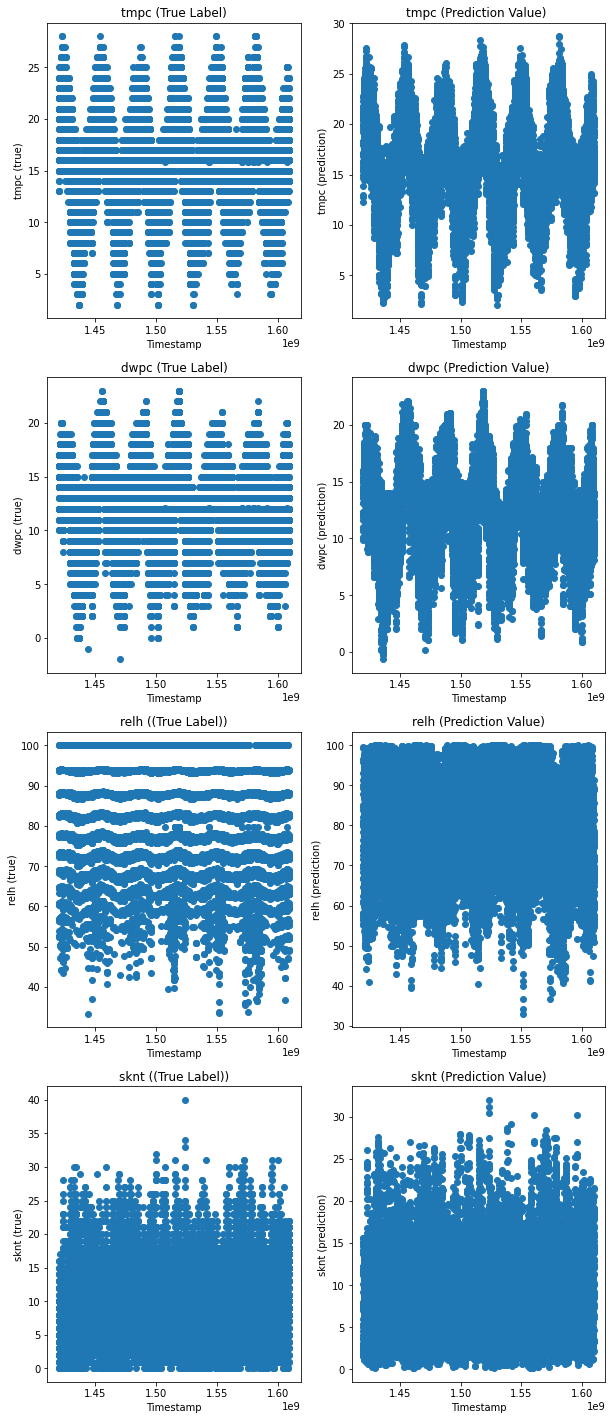

In [143]:
# Compare the prediction result and the ture label by scatter plot
fig = plt.figure()

#tmpc
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax1.scatter(X_test['timestamp'], Y_test['tmpc'])
ax2.scatter(X_test['timestamp'], y_output['tmpc'])

ax1.set_title('tmpc (True Label)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('tmpc (true)')

ax2.set_title('tmpc (Prediction Value) ')
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('tmpc (prediction)')

#dwpc
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax3.scatter(X_test['timestamp'], Y_test['dwpc'])
ax4.scatter(X_test['timestamp'], y_output['dwpc'])

ax3.set_title('dwpc (True Label)')
ax3.set_xlabel('Timestamp')
ax3.set_ylabel('dwpc (true)')

ax4.set_title('dwpc (Prediction Value)')
ax4.set_xlabel('Timestamp')
ax4.set_ylabel('dwpc (prediction)')

#relh
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax5.scatter(X_test['timestamp'], Y_test['relh'])
ax6.scatter(X_test['timestamp'], y_output['relh'])

ax5.set_title('relh ((True Label))')
ax5.set_xlabel('Timestamp')
ax5.set_ylabel('relh (true)')

ax6.set_title('relh (Prediction Value)')
ax6.set_xlabel('Timestamp')
ax6.set_ylabel('relh (prediction)')

#sknt
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)
ax7.scatter(X_test['timestamp'], Y_test['sknt'])
ax8.scatter(X_test['timestamp'], y_output['sknt'])

ax7.set_title('sknt ((True Label))')
ax7.set_xlabel('Timestamp')
ax7.set_ylabel('sknt (true)')

ax8.set_title('sknt (Prediction Value)')
ax8.set_xlabel('Timestamp')
ax8.set_ylabel('sknt (prediction)')

fig.set_size_inches(10,25)
plt.show()

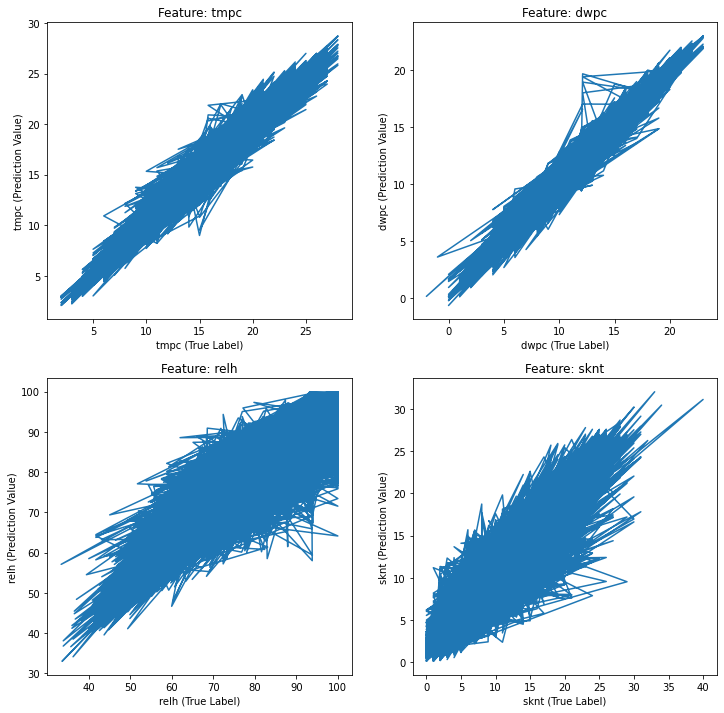

In [144]:
# Compare the prediction result and the ture label by normal plot
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(Y_test['tmpc'], y_output['tmpc'])
ax1.set_title('Feature: tmpc')
ax1.set_xlabel('tmpc (True Label)')
ax1.set_ylabel('tmpc (Prediction Value)')


ax2.plot(Y_test['dwpc'], y_output['dwpc'])
ax2.set_title('Feature: dwpc')
ax2.set_xlabel('dwpc (True Label)')
ax2.set_ylabel('dwpc (Prediction Value)')

ax3.plot(Y_test['relh'], y_output['relh'])
ax3.set_title('Feature: relh')
ax3.set_xlabel('relh (True Label)')
ax3.set_ylabel('relh (Prediction Value)')

ax4.plot(Y_test['sknt'], y_output['sknt'])
ax4.set_title('Feature: sknt')
ax4.set_xlabel('sknt (True Label)')
ax4.set_ylabel('sknt (Prediction Value)')

fig.set_size_inches(12,12)
plt.show()

In [145]:
# Measureing the mean square error 

from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(df_out[['tmpc']],Y_test[['tmpc']])
MSE2 = mean_squared_error(df_out[['dwpc']],Y_test[['dwpc']])
MSE3 = mean_squared_error(df_out[['relh']],Y_test[['relh']])
MSE4 = mean_squared_error(df_out[['sknt']],Y_test[['sknt']])
print("The MSE of feature tmpc is: ", MSE1)
print("The MSE of feature dwpc is: ", MSE2)
print("The MSE of feature relh is: ", MSE3)
print("The MSE of feature sknt is: ", MSE4)

The MSE of feature tmpc is:  34.678270617373514
The MSE of feature dwpc is:  27.52077850016723
The MSE of feature relh is:  287.60673414301573
The MSE of feature sknt is:  52.6410906955751


In [146]:
# Prediction
# Check the latest date of given dataset
dataset.tail(2)

,station,valid,tmpc,dwpc,relh,sknt,year,month,day,hour,minute,second,time,datetime,timestamp
103711,NZAA,2020-12-30 23:00,20.0,14.0,68.35,7.0,2020,12,30,23,0,0,82800,2020-12-30 23:00:00,1609369200
103712,NZAA,2020-12-30 23:30,22.0,14.0,60.44,6.0,2020,12,30,23,30,0,84600,2020-12-30 23:30:00,1609371000


In [147]:
# Creat the X_set of prediction 
prediction_set = pd.read_csv("/Users/kittyli/Downloads/prediction_input.csv")
prediction_set.head(5)

,valid
0,12/31/2020 0:00
1,12/31/2020 0:30
2,12/31/2020 1:00
3,12/31/2020 1:30
4,12/31/2020 2:00


In [148]:
# Convert the prediction set to model feature set

prediction_set['year'] = pd.DatetimeIndex(prediction_set['valid']).year
prediction_set['month'] = pd.DatetimeIndex(prediction_set['valid']).month
prediction_set['day'] = pd.DatetimeIndex(prediction_set['valid']).day
prediction_set['hour'] = pd.DatetimeIndex(prediction_set['valid']).hour
prediction_set['minute'] = pd.DatetimeIndex(prediction_set['valid']).minute
prediction_set['second'] = pd.DatetimeIndex(prediction_set['valid']).second
prediction_set['time'] = prediction_set['hour']*3600 + prediction_set['minute'] * 60 + prediction_set['second']

prediction_set["datetime"]= pd.to_datetime(prediction_set["valid"]) 
prediction_set['timestamp'] = prediction_set[['datetime']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
prediction_set.head(5)


,valid,year,month,day,hour,minute,second,time,datetime,timestamp
0,12/31/2020 0:00,2020,12,31,0,0,0,0,2020-12-31 00:00:00,1609372800
1,12/31/2020 0:30,2020,12,31,0,30,0,1800,2020-12-31 00:30:00,1609374600
2,12/31/2020 1:00,2020,12,31,1,0,0,3600,2020-12-31 01:00:00,1609376400
3,12/31/2020 1:30,2020,12,31,1,30,0,5400,2020-12-31 01:30:00,1609378200
4,12/31/2020 2:00,2020,12,31,2,0,0,7200,2020-12-31 02:00:00,1609380000


In [149]:
# Convert the input set to acceptable format
X_prediction = prediction_set[['year','month','day','time','timestamp']]

# Prediction
y_prediction = multi_output_model.predict(X_prediction)

In [150]:
# Add the column name to outputset
# Show the information

y_prediction= pd.DataFrame(y_prediction,columns = ["tmpc","dwpc","relh","sknt"])
y_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    1488 non-null   float64
 1   dwpc    1488 non-null   float64
 2   relh    1488 non-null   float64
 3   sknt    1488 non-null   float64
dtypes: float64(4)
memory usage: 46.6 KB


In [151]:
# Show the top 5 row of prediction values 
y_prediction.head(5)

,tmpc,dwpc,relh,sknt
0,20.18,13.54,63.9545,13.92
1,20.42,13.52,61.5567,13.85
2,20.51,13.52,60.6530,13.65
3,20.64,13.53,60.1894,13.68
4,20.66,13.53,59.9443,13.72


In [152]:
final_output = pd.DataFrame()
final_output["valid"] = prediction_set["valid"]
final_output["tmpc"] = y_prediction["tmpc"]
final_output["dwpc"] = y_prediction["dwpc"]
final_output["relh"] = y_prediction["relh"]
final_output["sknt"] = y_prediction["sknt"]

final_output.head(5)

,valid,tmpc,dwpc,relh,sknt
0,12/31/2020 0:00,20.18,13.54,63.9545,13.92
1,12/31/2020 0:30,20.42,13.52,61.5567,13.85
2,12/31/2020 1:00,20.51,13.52,60.6530,13.65
3,12/31/2020 1:30,20.64,13.53,60.1894,13.68
4,12/31/2020 2:00,20.66,13.53,59.9443,13.72


In [153]:
# Save as a csv file
# You can change the path

final_output.to_csv("prediction_result.csv")

In [154]:
# Evaluation